In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
model = 'Lorenz63'
da_method = 'KF'
df = pd.read_csv('./' + model + '_' + da_method + '.csv')

In [10]:
df

,timestep,x_true,y_true,z_true,x_sim,y_sim,z_sim,x_da,y_da,z_da,x_obs,y_obs
0,0.00,0.000000,10.000000,20.000000,0.100000,10.100000,20.100000,1.000000e-01,1.010000e+01,2.010000e+01,None,None
1,0.05,3.974004,10.470530,18.537555,4.080108,10.595998,18.686013,4.080108e+00,1.059600e+01,1.868601e+01,None,None
2,0.10,6.916687,12.448457,19.188226,7.030460,12.566883,19.410273,7.030460e+00,1.256688e+01,1.941027e+01,None,None
3,0.15,9.616634,14.850631,22.148285,9.719342,14.895528,22.447415,9.719342e+00,1.489553e+01,2.244742e+01,None,None
4,0.20,11.974400,15.868959,27.324587,12.023441,15.759574,27.627921,1.206608e+01,1.577217e+01,2.763581e+01,11.97,15.87
5,0.25,13.158802,13.690046,32.867020,13.112066,13.439181,33.020993,1.313956e+01,1.343237e+01,3.305521e+01,None,None
6,0.30,12.382207,8.869207,35.640688,12.252815,8.635602,35.572762,1.226086e+01,8.602725e+00,3.559972e+01,None,None
7,0.35,9.984532,4.366882,34.616637,9.842249,4.271331,34.426747,9.832109e+00,4.231991e+00,3.443045e+01,None,None
8,0.40,7.193353,1.974796,31.505801,7.096625,1.997247,31.309145,6.972474e+00,2.271741e+00,2.920253e+01,7.19,1.97
9,0.45,4.962804,1.338797,28.010766,4.926915,1.419092,27.848865,5.087064e+00,2.237880e+00,2.616305e+01,None,None


In [11]:
timestep = df[' timestep'].tolist()

In [12]:
x_true, y_true, z_true = df[' x_true'].tolist(), df[' y_true'].tolist(), df[' z_true'].tolist()
x_sim, y_sim, z_sim = df[' x_sim'].tolist(), df[' y_sim'].tolist(), df[' z_sim'].tolist()
x_da, y_da, z_da = df[' x_da'].tolist(), df[' y_da'].tolist(), df[' z_da'].tolist()

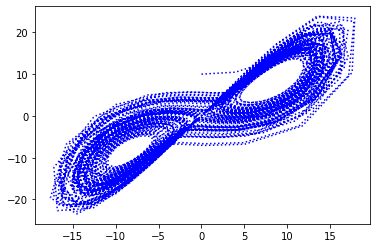

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_true[:], y_true[:], 'b:', label='True')
#ax.plot(x_sim[:], y_sim[:], 'b:', label='True')

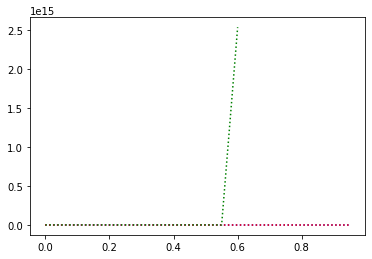

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(timestep[:20], y_true[:20], 'b:', label='True')
ax.plot(timestep[:20], y_sim[:20], 'r:', label='Sim')
ax.plot(timestep[:20], y_da[:20], 'g:', label='Sim')